In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [92]:
model_dir = './models'

os.makedirs(model_dir, exist_ok=True)

In [93]:
dataset = pd.read_csv('titanic.csv')

In [94]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [96]:
dataset.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [97]:
X = dataset[0:443]
y = dataset[443:886]

X = dataset[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']]
y = dataset['Survived']

X = X.replace({'male': 0, 'female': 1})

C:\Users\felip\AppData\Local\Temp\ipykernel_28012\429990428.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({'male': 0, 'female': 1})


In [98]:
X

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0
...,...,...,...,...,...
882,2,0,27.0,0,0
883,1,1,19.0,0,0
884,3,1,7.0,1,2
885,1,0,26.0,0,0


In [99]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, PowerTransformer

def preProcessData(alg, epochs=100):
    scaler = alg()

    X_test_normalized = scaler.fit_transform(X_test)
    X_train_normalized = scaler.fit_transform(X_train)

    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    tensor_x_train = tf.convert_to_tensor(X_train_normalized, dtype=tf.float32)
    tensor_y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
    tensor_x_test = tf.convert_to_tensor(X_test_normalized, dtype=tf.float32)
    tensor_y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

    history = model.fit(tensor_x_train, tensor_y_train, epochs=epochs, batch_size=512, validation_data=(tensor_x_test, tensor_y_test), verbose=1)
    results = model.evaluate(X_test, y_test)

    model_path = os.path.join(model_dir, f'melhor_modelo_pesos_{type(scaler).__name__}.weights.h5')
    # model.save_weights(model_path)
    model.save(model_path)

    print(f"Pesos salvos com sucesso em: {model_path}")

    history_df = pd.DataFrame(history.history)
    return history_df, {'accuracy': f'{(results[0]*100):.2f}%', 'loss': f'{(results[1]*100):.2f}%'}

In [102]:
def showData(resultDF: pd.DataFrame, model):
  resultDF[['accuracy', 'val_accuracy']].plot()
  plt.title(f'Acurácia do Modelo - {model}')
  plt.xlabel('Época')
  plt.ylabel('Acurácia')
  plt.show()

  resultDF[['loss', 'val_loss']].plot()
  plt.title(f'Perda do Modelo - {model}')
  plt.xlabel('Época')
  plt.ylabel('Perda')
  plt.show()

# Resultados Gráficos

In [103]:
df, results_MinMax = preProcessData(MinMaxScaler)

showData(df, 'MinMaxScaler')
print(results_MinMax)

Epoch 1/100


c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.3939 - loss: 0.6961 - val_accuracy: 0.3820 - val_loss: 0.6934
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4393 - loss: 0.6933 - val_accuracy: 0.6217 - val_loss: 0.6928
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6067 - loss: 0.6928 - val_accuracy: 0.6217 - val_loss: 0.6926
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6133 - loss: 0.6927 - val_accuracy: 0.6217 - val_loss: 0.6924
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6159 - loss: 0.6924 - val_accuracy: 0.6217 - val_loss: 0.6922
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6074 - loss: 0.6923 - val_accuracy: 0.6217 - val_loss: 0.6919
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6113 - loss: 0.6920 - val_accuracy: 0.6217 - val_loss: 0.6917
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6100 - loss: 0.6918 - val_accuracy: 0.6217 - val_loss: 0.6914
Epo

ValueError: The filename must end in `.weights.h5`. Received: filepath=./models\melhor_modelo_pesos_MinMaxScaler.keras

Epoch 1/100


c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6102 - loss: 0.6895 - val_accuracy: 0.6217 - val_loss: 0.6822
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6165 - loss: 0.6815 - val_accuracy: 0.6217 - val_loss: 0.6755
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6061 - loss: 0.6753 - val_accuracy: 0.6217 - val_loss: 0.6695
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6113 - loss: 0.6689 - val_accuracy: 0.6217 - val_loss: 0.6639
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6139 - loss: 0.6628 - val_accuracy: 0.6217 - val_loss: 0.6587
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6080 - loss: 0.6583 - val_accuracy: 0.6217 - val_loss: 0.6542
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6126 - loss: 0.6525 - val_accuracy: 0.6217 - val_loss: 0.6500
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6107 - loss: 0.6487 - val_accuracy: 0.6292 - val_loss: 0.6463
Epo

Pesos salvos com sucesso em: ./models\melhor_modelo_pesos_StandardScaler.weights.h5


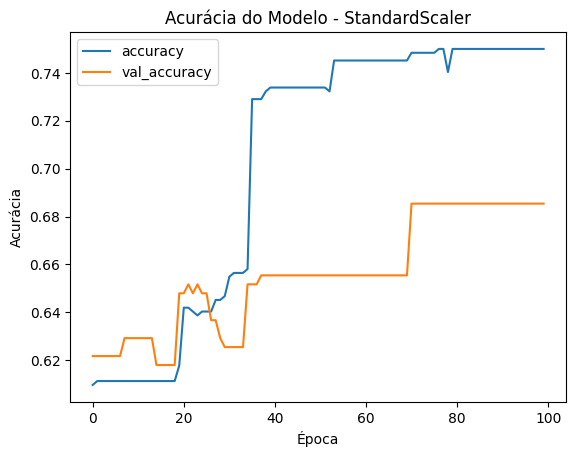

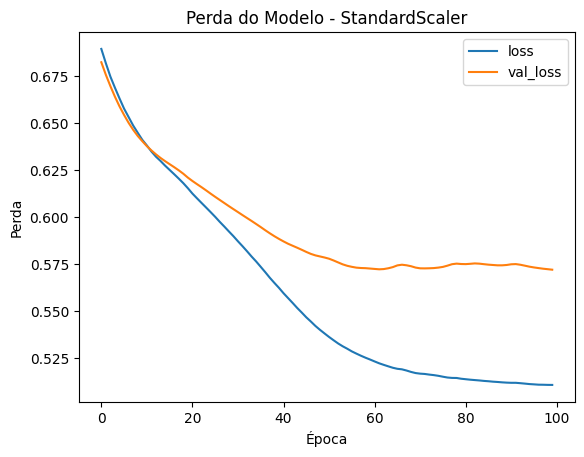

{'accuracy': '56.01%', 'loss': '69.29%'}


In [86]:
df, results_Std = preProcessData(StandardScaler)

showData(df, 'StandardScaler')
print(results_Std)

Epoch 1/100


c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6545 - loss: 0.6888 - val_accuracy: 0.6217 - val_loss: 0.6819
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6260 - loss: 0.6821 - val_accuracy: 0.6217 - val_loss: 0.6758
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6268 - loss: 0.6764 - val_accuracy: 0.6404 - val_loss: 0.6702
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6508 - loss: 0.6702 - val_accuracy: 0.6554 - val_loss: 0.6650
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6465 - loss: 0.6659 - val_accuracy: 0.6554 - val_loss: 0.6600
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6517 - loss: 0.6600 - val_accuracy: 0.6554 - val_loss: 0.6547
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6491 - loss: 0.6554 - val_accuracy: 0.6554 - val_loss: 0.6498
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6447 - loss: 0.6510 - val_accuracy: 0.6554 - val_loss: 0.6451
Epo

Pesos salvos com sucesso em: ./models\melhor_modelo_pesos_RobustScaler.weights.h5


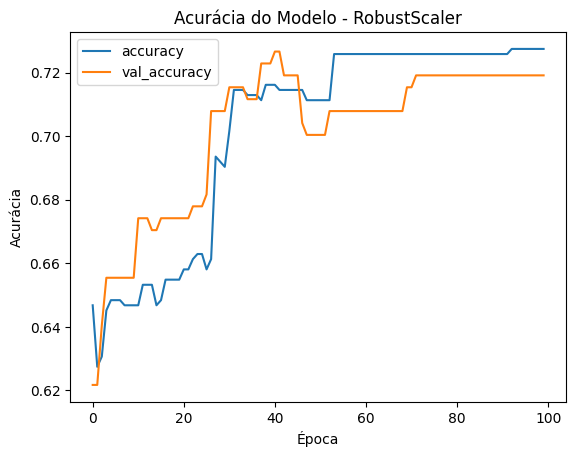

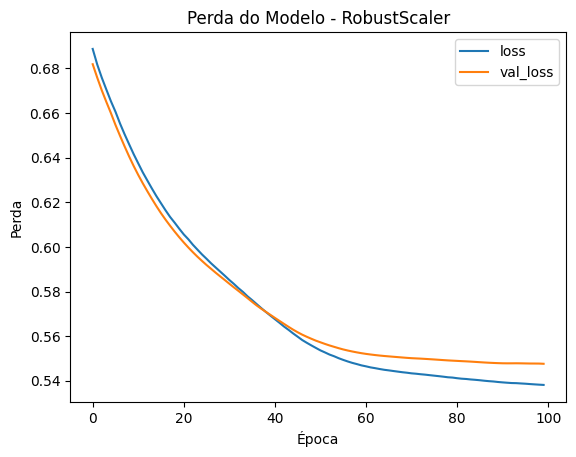

{'accuracy': '54.59%', 'loss': '73.78%'}


In [87]:
df, results_RS = preProcessData(RobustScaler)

showData(df, 'RobustScaler')
print(results_RS)

Epoch 1/100


c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.4872 - loss: 0.6935 - val_accuracy: 0.6217 - val_loss: 0.6888
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6061 - loss: 0.6891 - val_accuracy: 0.6217 - val_loss: 0.6843
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6113 - loss: 0.6848 - val_accuracy: 0.6217 - val_loss: 0.6798
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6093 - loss: 0.6809 - val_accuracy: 0.6217 - val_loss: 0.6759
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6146 - loss: 0.6768 - val_accuracy: 0.6217 - val_loss: 0.6726
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6061 - loss: 0.6751 - val_accuracy: 0.6217 - val_loss: 0.6698
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6087 - loss: 0.6723 - val_accuracy: 0.6217 - val_loss: 0.6673
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6113 - loss: 0.6696 - val_accuracy: 0.6217 - val_loss: 0.6654
Epo

Pesos salvos com sucesso em: ./models\melhor_modelo_pesos_MaxAbsScaler.weights.h5


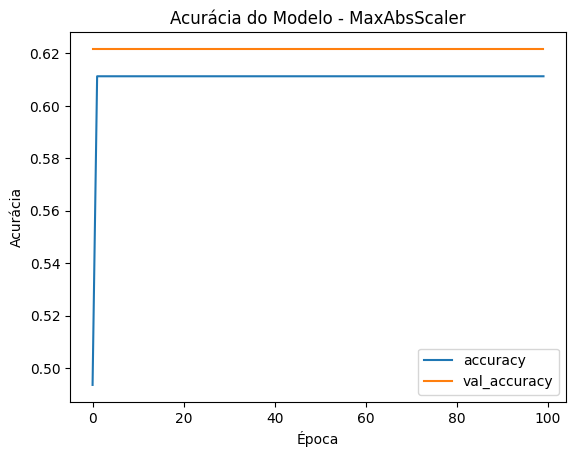

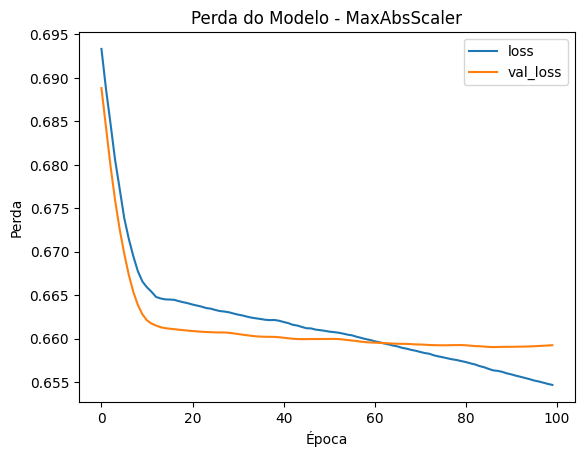

{'accuracy': '64.26%', 'loss': '62.17%'}


In [88]:
df, results_MaxAbs = preProcessData(MaxAbsScaler)

showData(df, 'MaxAbsScaler')
print(results_MaxAbs)

Epoch 1/100


c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.6148 - loss: 0.6899 - val_accuracy: 0.6217 - val_loss: 0.6820
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6148 - loss: 0.6821 - val_accuracy: 0.6217 - val_loss: 0.6766
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6115 - loss: 0.6772 - val_accuracy: 0.6217 - val_loss: 0.6712
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6184 - loss: 0.6717 - val_accuracy: 0.6217 - val_loss: 0.6658
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6133 - loss: 0.6661 - val_accuracy: 0.6217 - val_loss: 0.6610
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6113 - loss: 0.6618 - val_accuracy: 0.6217 - val_loss: 0.6564
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6093 - loss: 0.6580 - val_accuracy: 0.6217 - val_loss: 0.6521
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6120 - loss: 0.6533 - val_accuracy: 0.6217 - val_loss: 0.6480
Epo

Pesos salvos com sucesso em: ./models\melhor_modelo_pesos_PowerTransformer.weights.h5


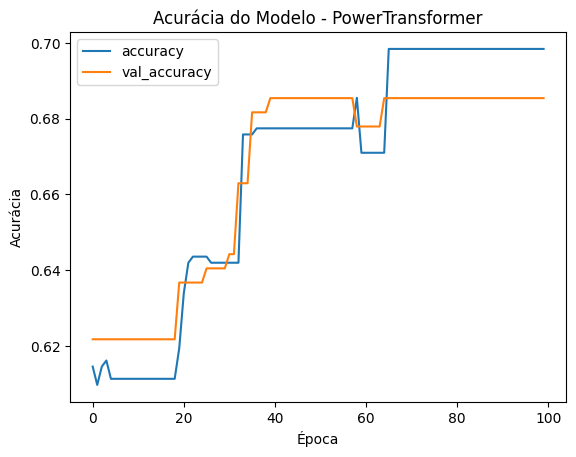

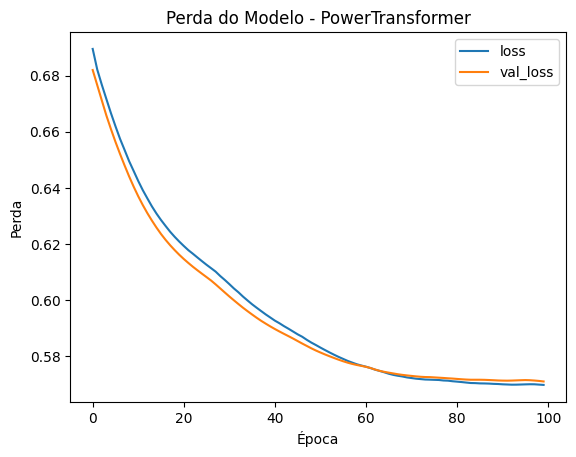

{'accuracy': '58.64%', 'loss': '70.41%'}


In [89]:
df, results_PowerT = preProcessData(PowerTransformer)

showData(df, 'PowerTransformer')
print(results_PowerT)

In [90]:
results = [results_MinMax, results_Std, results_RS, results_MaxAbs, results_PowerT]
labels = ['MinMaxScaler', 'StandartScaler', 'RobustScaler', 'MaxAbsScaler', 'PowerTransformer']

for i in range(len(results)):
  print(f'{labels[i]}')
  print(f'{results[i]}\n')

MinMaxScaler
{'accuracy': '63.62%', 'loss': '68.91%'}

StandartScaler
{'accuracy': '56.01%', 'loss': '69.29%'}

RobustScaler
{'accuracy': '54.59%', 'loss': '73.78%'}

MaxAbsScaler
{'accuracy': '64.26%', 'loss': '62.17%'}

PowerTransformer
{'accuracy': '58.64%', 'loss': '70.41%'}

